# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  
    
> 다만 서비스 제공자의 입장에서는??

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
> - 원하는 인터넷페이지 주소 입력  
> - 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
> - 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url 정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

### 웹 크롤링을 위해 BeautifulSoup 사용
> - requests는 요청을 받기는 하지만 text로만 받음  
> - API는 통신을 위해 정형화 된 데이터 형태의 text  
> - 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
> - text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

In [1]:
# 필요패키지 import
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

#### 네이버 메인페이지 크롤링

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_mousegesture_v2@2x.png" style="padding-left: 90px" width="200"/>,
 <img alt="아시아경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/277.png"/>,
 <img alt="프레시안" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/002.png"/>,
 <img alt="뉴데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/327.png"/>,
 <img alt="중앙일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2021/0824/nsd115034872.png"/>,
 <img alt="중앙데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/330.png"/>,
 <img alt="서울경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2019/logo/011.png"/>,
 <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2022/0208/nsd16121208.png"/>,
 <
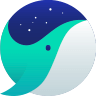
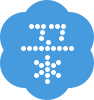

In [2]:
'''
정보를 가져오고자 하는 url 정의
url 정보로 requests로 정보 요청
text 정보를 html로 변환
html에서 우리가 필요한 정보만 선별
'''
# 네이버 메인페이지
# url정의(문자열 형식으로 전달, https:// 포함)
url = 'https://www.naver.com'

# requsts로 url에 정보요청
# requests 파이썬이 컴퓨터간 통신체계에 해당하는 명령어들을 사용하도록 만든 패키지
# 해당코드를 실행시키는 순간 서비스제공자에게 정보요청을 함.

resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img')

#### 다음 뉴스페이지 크롤링

In [3]:
# 다음 뉴스 페이지 크롤링
# url정의
url = 'https://news.daum.net/'

# requsts로 url에 정보요청
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

# html 내에서 뉴스헤더 선별
for news in html.select('a.link_txt')[:-13]:
    print(news.text.strip())

서울 시내버스 총파업 현실화하나..노사 막판 협상 '진통'
새 집무실 이름은 국민의집?..尹 당선인, '피플스 하우스' 언급
사업과 우정 사이..망가진 "CNN의 미래" 파워게임 속사정
변협회장 결선투표제 폐지..회관 서초동으로 이전
소액으로 고액자산 쉽게 사지만.. '먹튀'땐 보호 못받는다[조각투자, 혁신인가 허상인가]
선거브로커 돈 받은 국회의원, 단체장은 누구?
주 52시간 근무제 도입했더니..장시간 노동자 60% 감소
'죽고 싶다' '우울해' 검색 폭증.. 코로나는 끝나지 않았다
충북대병원 전공의협 "오송 카이스트 의전원 건립 반대"
우크라 이어 몰도바도?..러, 공격 타깃 시사에 전운 ↑
한덕수 청문회, 첫날부터 파행..질의없이 '53분짜리' 반쪽회의
물건너간 코레일-SR 통합.. 적자문제 해결은 새정부 몫으로
"랄프를 구해줘"..동물대체시험법 제정 위한 국회 전시회 열린다
'글로벌 매도세' 유럽증시도 일제 급락..佛 CAC 2.62%↓
'2500조 채권' 소화 한계.. 글로벌지수 편입해 수급 터준다
해외법인 매출 증가율, 국내보다 2배 높아..고용창출 저하 우려
국민의힘, '검수완박' 재협상 공식화.. 민주 "합의 깨면 단독처리"
차영주 "금리 인상기에 수혜 잃을 수 있어 WGBI 편입 서두르는 것"[생생경제]
한때는 적, 지금은 동지: 국민의힘 편[지방선거이야기]
"성장보다 물가가 더 걱정"..긴축 또 강조한 이창용
[여의도 사사건건] 허은아 "합의 파기 아닌 재논의 요청" 전재수 "국회 합의안 엎어버리는 '당선자의 독주'"
[비디오머그] 해외 주식 소수점 투자, 아낀 것 같은데요. 사실은 비쌉니다.
[마음주치의] 우울한 노년의 부모님. 어떻게 병원에 모시고 갈 수 있나 (오강섭 교수)
[월드피플+] 꼬마 아인슈타인?..美 13세 대학생, 박사과정 합격 "물리학자가 꿈"
[생생경제] 차영주 "금리 인상기에 수혜 잃을 수 있어 WGBI 편입 서두르는 것"
[이앤피] "현직 검사 '선거사범 수사 못 하는 검수완박 합의안' 발언 外"
장관님·차관님·청장

In [4]:
html = BeautifulSoup(resp.text, 'html.parser')

In [5]:
for news in html.select('a.link_txt')[:-13]:
    print(news.text.strip().replace('[', '').replace(']', ''))

서울 시내버스 총파업 현실화하나..노사 막판 협상 '진통'
새 집무실 이름은 국민의집?..尹 당선인, '피플스 하우스' 언급
사업과 우정 사이..망가진 "CNN의 미래" 파워게임 속사정
변협회장 결선투표제 폐지..회관 서초동으로 이전
소액으로 고액자산 쉽게 사지만.. '먹튀'땐 보호 못받는다조각투자, 혁신인가 허상인가
선거브로커 돈 받은 국회의원, 단체장은 누구?
주 52시간 근무제 도입했더니..장시간 노동자 60% 감소
'죽고 싶다' '우울해' 검색 폭증.. 코로나는 끝나지 않았다
충북대병원 전공의협 "오송 카이스트 의전원 건립 반대"
우크라 이어 몰도바도?..러, 공격 타깃 시사에 전운 ↑
한덕수 청문회, 첫날부터 파행..질의없이 '53분짜리' 반쪽회의
물건너간 코레일-SR 통합.. 적자문제 해결은 새정부 몫으로
"랄프를 구해줘"..동물대체시험법 제정 위한 국회 전시회 열린다
'글로벌 매도세' 유럽증시도 일제 급락..佛 CAC 2.62%↓
'2500조 채권' 소화 한계.. 글로벌지수 편입해 수급 터준다
해외법인 매출 증가율, 국내보다 2배 높아..고용창출 저하 우려
국민의힘, '검수완박' 재협상 공식화.. 민주 "합의 깨면 단독처리"
차영주 "금리 인상기에 수혜 잃을 수 있어 WGBI 편입 서두르는 것"생생경제
한때는 적, 지금은 동지: 국민의힘 편지방선거이야기
"성장보다 물가가 더 걱정"..긴축 또 강조한 이창용
여의도 사사건건 허은아 "합의 파기 아닌 재논의 요청" 전재수 "국회 합의안 엎어버리는 '당선자의 독주'"
비디오머그 해외 주식 소수점 투자, 아낀 것 같은데요. 사실은 비쌉니다.
마음주치의 우울한 노년의 부모님. 어떻게 병원에 모시고 갈 수 있나 (오강섭 교수)
월드피플+ 꼬마 아인슈타인?..美 13세 대학생, 박사과정 합격 "물리학자가 꿈"
생생경제 차영주 "금리 인상기에 수혜 잃을 수 있어 WGBI 편입 서두르는 것"
이앤피 "현직 검사 '선거사범 수사 못 하는 검수완박 합의안' 발언 外"
장관님·차관님·청장님.. 임기 말 해외출장 꼭 가야

In [6]:
# 다음에서 로또번호 혹은 로또로 검색해서 표시되는 로또번호 크롤링 해오기
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8'

# requsts로 url에 정보요청
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

In [7]:
for ball_nm in html.select('span.ball'):
    print(ball_nm.text)

5
11
18
20
35
45
3


In [8]:
for ball_nm in html.select('span.ball'):
    print(ball_nm.text)

5
11
18
20
35
45
3


### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">비비고 왕교자</span>
<span class="product" id="1235">비비고 볶음밥</span>

>> 단일 셀렉터  
html.select('span')  # 태그 이름이 span인 친구들을 다 들고옴  
<span class="news" id="1234">비비고 왕교자</span>
<span class="product" id="1235">비비고 볶음밥</span>

>> 클래스 포함 셀렉터
html.select('span.news')
<span class="product" id="1235">비비고 볶음밥</span>

>> id 포함 셀렉터
id(고유값) : #1234
html.select('span#1234')
<span class="news" id="1234">비비고 왕교자</span>

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    em 태그 중에서 class가 txt 인 라인을 찾고\ 싶다. : em.txt

    2. 경로 셀렉터
    
    <span>이걸 찾으려면?</span>
    <span>이걸 찾으려면?</span>
    <span>이걸 찾으려면?</span>
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [9]:
import time

In [10]:
for i in range(5):
    time.sleep(2)
    print(i)

0
1
2
3
4


In [11]:
key_list = ['슬기로운의사생활, 도깨비, 오징어게임']
for item in key_list:
    print(item)

슬기로운의사생활, 도깨비, 오징어게임


In [12]:
# 슬의생, 도깨비, 오징어게임
# 드라마 하나 정해서 크롤링 완료 된 것 확인하시고 # 슬의생, 도깨비, 오징어게임 리스트 만들어서 완성
# 슬의생 드라마소개 크롤링
# url 정의
key_list = ['슬기로운의사생활', '도깨비', '오징어게임']
for key_word in key_list:
    
    time.sleep(2)
    url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={key_word}'

    # requsts로 url에 정보요청
    resp = requests.get(url)

    # 정보를 html 변환 (보기 쉽게)
    html = BeautifulSoup(resp.text, 'html.parser')

    print(key_word, html.select('span.desc')[0].text)

슬기로운의사생활 누군가는 태어나고 누군가는 삶을 끝내는, 인생의 축소판이라 불리는 병원에서 평범한 듯 특별한 하루하루를 살아가는 사람들과 눈빛만 봐도 알 수 있는 20년지기 친구들의 케미스토리를 담은 드라마
도깨비 불멸의 삶을 끝내기 위해 인간 신부가 필요한 도깨비, 그와 기묘한 동거를 시작한 기억상실증 저승사자. 그런 그들 앞에 '도깨비 신부'라 주장하는 '죽었어야 할 운명'의 소녀가 나타나며 벌어지는 신비로운 낭만 설화
오징어게임 456억 원의 상금이 걸린 의문의 서바이벌에 참가한 사람들이 최후의 승자가 되기 위해 목숨을 걸고 극한의 게임에 도전하는 이야기를 담은 넷플릭스 시리즈


In [13]:
# 서비스 제공자가
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

## 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다 (30페이지)

In [14]:
# url 설정 (페이지 넘어가는 url 설정을 어떻게 할건지?)
# 순환시키면서 저 requests 요청을 어떻게 컨트롤 할 건지?
lotto_list = []
for i in range(1, 31):
    print(f'{i}회차 크롤링 중입니다.')
    
    # 차단막긔
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    # url 설정
    url = f'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={i}회차%로또'
    
    # requests로 데이터 요청하기
    resp = requests.get(url)
    
    # html로 변환
    html = BeautifulSoup(resp.text, 'html.parser')

    # 데이터 선별
    for ball_nm in html.select('span.ball')[:6]:
        lotto_list.append(int(ball_nm.text))
        
print('크롤링 완료!!!')

1회차 크롤링 중입니다.
2회차 크롤링 중입니다.
3회차 크롤링 중입니다.
4회차 크롤링 중입니다.
5회차 크롤링 중입니다.
6회차 크롤링 중입니다.
7회차 크롤링 중입니다.
8회차 크롤링 중입니다.
9회차 크롤링 중입니다.
10회차 크롤링 중입니다.
11회차 크롤링 중입니다.
12회차 크롤링 중입니다.
13회차 크롤링 중입니다.
14회차 크롤링 중입니다.
15회차 크롤링 중입니다.
16회차 크롤링 중입니다.
17회차 크롤링 중입니다.
18회차 크롤링 중입니다.
19회차 크롤링 중입니다.
20회차 크롤링 중입니다.
21회차 크롤링 중입니다.
22회차 크롤링 중입니다.
23회차 크롤링 중입니다.
24회차 크롤링 중입니다.
25회차 크롤링 중입니다.
26회차 크롤링 중입니다.
27회차 크롤링 중입니다.
28회차 크롤링 중입니다.
29회차 크롤링 중입니다.
30회차 크롤링 중입니다.
크롤링 완료!!!


In [15]:
np.array(lotto_list).reshape(-1, 6).reshape(1, -1)

array([[10, 23, 29, 33, 37, 40,  9, 13, 21, 25, 32, 42, 11, 16, 19, 21,
        27, 31, 14, 27, 30, 31, 40, 42, 16, 24, 29, 40, 41, 42, 14, 15,
        26, 27, 40, 42,  2,  9, 16, 25, 26, 40,  8, 19, 25, 34, 37, 39,
         2,  4, 16, 17, 36, 39,  9, 25, 30, 33, 41, 44,  1,  7, 36, 37,
        41, 42,  2, 11, 21, 25, 39, 45, 22, 23, 25, 37, 38, 42,  2,  6,
        12, 31, 33, 40,  3,  4, 16, 30, 31, 37,  6,  7, 24, 37, 38, 40,
         3,  4,  9, 17, 32, 37,  3, 12, 13, 19, 32, 35,  6, 30, 38, 39,
        40, 43, 10, 14, 18, 20, 23, 30,  6, 12, 17, 18, 31, 32,  4,  5,
         6,  8, 17, 39,  5, 13, 17, 18, 33, 42,  7,  8, 27, 29, 36, 43,
         2,  4, 21, 26, 43, 44,  4,  5,  7, 18, 20, 25,  1, 20, 26, 28,
        37, 43,  9, 18, 23, 25, 35, 37,  1,  5, 13, 34, 39, 40,  8, 17,
        20, 35, 36, 44]])

In [16]:
lotto = np.array(lotto_list).reshape(-1, 6)

In [17]:
index_list = [f'{i}회차' for i in range(1, 31)]

In [18]:
df = pd.DataFrame(lotto,
                  index=index_list)
df

,0,1,2,3,4,5
1회차,10,23,29,33,37,40
2회차,9,13,21,25,32,42
3회차,11,16,19,21,27,31
4회차,14,27,30,31,40,42
5회차,16,24,29,40,41,42
6회차,14,15,26,27,40,42
7회차,2,9,16,25,26,40
8회차,8,19,25,34,37,39
9회차,2,4,16,17,36,39
10회차,9,25,30,33,41,44


In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

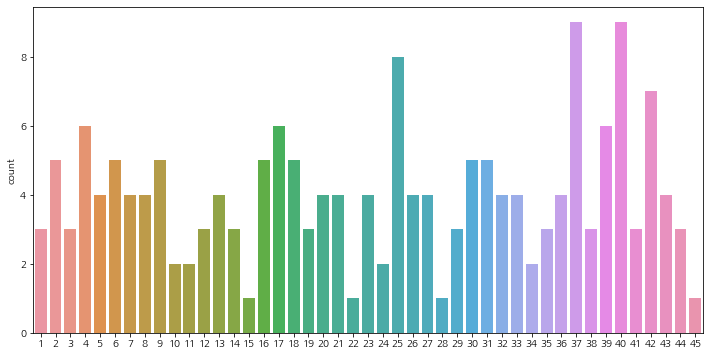

In [21]:
# 데이터 시각화까지
plt.figure(figsize=(12, 6))
sns.countplot(lotto_list)

In [22]:
resp

<Response [200]>

In [23]:
requests.codes.ok = 200
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

In [24]:
# 차단막는 코드
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

In [25]:
for item in html.select('span.ball'):
    print(item.text)

8
17
20
35
36
44
보너스
4


## **네이버 키워드로 검색한 결과를 크롤링(속성 접근)**

In [26]:
key_word = input('검색어를 입력하세요 : ')

url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={key_word}'
    
# requests로 데이터 요청하기
resp = requests.get(url)

# html로 변환
html = BeautifulSoup(resp.text, 'html.parser')

In [27]:
for item in html.select('a.api_txt_lines'):
    print(item.text, item.attrs['href'])

11-선형회귀 대 로지스틱 회귀의 차이점 대한 이해 https://blog.naver.com/tommybee/222663258125
선형 회귀 (Linear Regression) - 손실, 경사하강법 https://blog.naver.com/hoijae0194/221921243359
[인공지능] 6. 선형 회귀의 원리, 다중 선형 회귀의 원리 https://blog.naver.com/hsh0917h/222706415161
Linear Regression(선형회귀)에 대한 정리 https://blog.naver.com/book541/222651339528
R언어로 배우는 데이터분석 #13 - 머신러닝 데이터 분석 https://post.naver.com/viewer/postView.nhn?volumeNo=28501946&memberNo=2534901&vType=VERTICAL
[Machinelearning with Sci-Kit learn] 4. 선형 회귀 모델(Linear Regression) https://blog.naver.com/bo53621mi/222686208017
2. 다중 선형 회귀 분석 개념 https://blog.naver.com/dyk6208/222681770596
선형 회귀랑 다중 회귀 차이가 뭔가요.. ... 선형 회귀와 다중 회귀 두 개의 차이가 뭔가요?? 독립 변수는 x고 종속 변수는 y인데 선형 회귀: 종속변수와 한 개 이상의 독립 변수와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 다중 회귀: 독립변수가 K개 이며 종속변수와의 관계가 선형(1차 함수) 이렇게 되어있는데.. 차이가 뭔가요?...  https://kin.naver.com/qna/detail.naver?d1id=11&dirId=1128&docId=416621643&qb=7ISg7ZiV7ZqM6reA&enc=utf8§ion=kin.ext&rank=1&search_sort=0&spq=0
회귀분석은 보통 선형회귀입니다. 독립변수가 하나이면 단순 회귀분석(simple li

    가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

#### 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기

In [32]:
# url 정의
code = input('종목코드를 입력하세요 : ')
url = f'https://finance.naver.com/item/main.naver?code={code}'
# requests 요청
resp = requests.get(url)
# html 변환
html = BeautifulSoup(resp.text, 'html.parser')
# 시가총액, 외국인소진률, PER, PBR

In [33]:
# 시가총액
html.select('em#_market_sum')[0].text.replace('\n', '').replace('\t', '')

'1조6,732'

In [34]:
# 외국인소진율
# 경로셀렉터
html.select('tr.strong td em')[1].text

'18.82%'

In [35]:
# per
html.select('#_per')[0].text

'9.60'

In [36]:
# pbr
html.select('#_pbr')[0].text

'0.76'

In [37]:
# 종목명
html.select('div.wrap_company a')[0].text

'코오롱인더'

#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기(추가예정)

In [38]:
# 종목리스트 정의

# url 정의

# requests 요청

# html 변환

# 데이터 선별


In [39]:
# 데이터프레임 제작


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [40]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.
# requests 요청시에 헤더정보 추가
url = 'https://finance.naver.com/item/sise_day.naver?code=000660&page=2'

info = {
    'referer': 'https://finance.naver.com/item/sise_day.naver?code=000660&page=1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'
}

# 레퍼러정보 : 이 사용자가 이 페이지에 요청하기 전 어느 페이지에 있었는지
# 유저에이전트 : 사용자컴퓨터 정보

resp = requests.get(url, headers=info)

html = BeautifulSoup(resp.text, 'html.parser')

# 크롤링 -> 현업에서는 자주 쓰이는 스킬은 아님
# 필드마다다름 -> SSG.com -> 검색개발자 -> 모델링에 필요한 학습 문자를 크롤링
# 온라인커머스 -> 타사몰에 올라가있는 상품 가격

# 컬럼명 셀렉트
col_nm = [col.text for col in html.select('th')[1:]]

# 날짜 셀렉트
index = [date.text for date in html.select('span.p10')] # tah p10 gray03

# 가격정보 셀렉트
price = [p.text.strip() for p in html.select('span.p11')] # tah p11

price = np.array(price).reshape(-1, 6)

df = pd.DataFrame(price,
                 columns=col_nm,
                 index=index)
df

,종가,전일비,시가,고가,저가,거래량
2022.04.11,"111,500",500,"111,000","113,000","110,500","2,390,786"
2022.04.08,"112,000","1,500","113,000","114,000","110,500","4,268,316"
2022.04.07,"113,500",500,"111,500","114,500","110,500","5,027,865"
2022.04.06,"113,000","3,500","114,500","115,500","113,000","4,541,938"
2022.04.05,"116,500",500,"117,500","118,000","116,000","2,101,474"
2022.04.04,"117,000","1,000","115,000","117,500","114,500","2,470,792"
2022.04.01,"116,000","2,000","117,000","117,500","116,000","3,851,558"
2022.03.31,"118,000","3,000","119,500","120,000","117,500","4,558,063"
2022.03.30,"121,000","1,000","123,000","123,000","120,500","3,436,282"
2022.03.29,"120,000","2,000","119,500","120,500","118,500","3,375,247"


### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력(추가예정)

In [41]:
# 헤더정보 정의 (동적페이지 헤더정보 그대로 사용)

# 인덱스 정의

# 전체 가격 데이터 빈 데이터 프레임

# requests 요청시에 헤더정보 추가

# html 변환

# 날짜 인덱스 살려서 활용하기

# 가격정보 추출

# 데이터프레임 제작
pd.concat(df, temp_df)

NameError: name 'temp_df' is not defined

In [42]:
df.index

Index(['2022.04.11', '2022.04.08', '2022.04.07', '2022.04.06', '2022.04.05',
       '2022.04.04', '2022.04.01', '2022.03.31', '2022.03.30', '2022.03.29'],
      dtype='object')

In [43]:
df

,종가,전일비,시가,고가,저가,거래량
2022.04.11,"111,500",500,"111,000","113,000","110,500","2,390,786"
2022.04.08,"112,000","1,500","113,000","114,000","110,500","4,268,316"
2022.04.07,"113,500",500,"111,500","114,500","110,500","5,027,865"
2022.04.06,"113,000","3,500","114,500","115,500","113,000","4,541,938"
2022.04.05,"116,500",500,"117,500","118,000","116,000","2,101,474"
2022.04.04,"117,000","1,000","115,000","117,500","114,500","2,470,792"
2022.04.01,"116,000","2,000","117,000","117,500","116,000","3,851,558"
2022.03.31,"118,000","3,000","119,500","120,000","117,500","4,558,063"
2022.03.30,"121,000","1,000","123,000","123,000","120,500","3,436,282"
2022.03.29,"120,000","2,000","119,500","120,500","118,500","3,375,247"


In [44]:
def make_int(x):
    return int(x.replace(',', ''))

In [45]:
df['종가'] = df['종가'].apply(make_int)

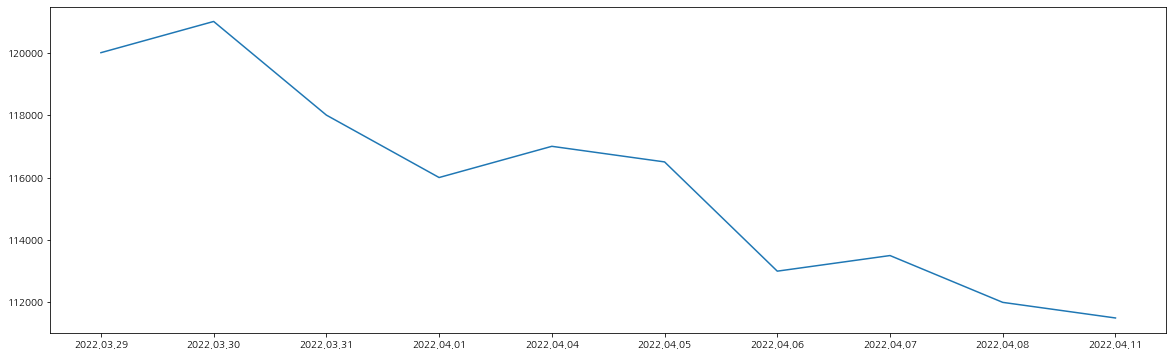

In [46]:
plt.figure(figsize=(20, 6))
plt.plot(df['종가'].sort_index())
plt.show()

### 종목도 여러개 순환시키고 각 개별종목 데이터 csv 저장하는 연습

### 네이버 데이터랩 인기검색어 크롤링

In [47]:
# json 데이터 파싱
url = 'https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000000'

info = {
    'referer': 'https://datalab.naver.com/',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'
}

In [48]:
resp = requests.post(url, headers=info)

In [49]:
import json

In [50]:
data = json.loads(resp.text)

In [51]:
data

[{'message': None,
  'statusCode': 200,
  'returnCode': 0,
  'date': '2022/04/13',
  'datetime': '2022.04.13.(수)',
  'range': '',
  'ranks': [{'rank': 1, 'keyword': '원피스', 'linkId': '원피스'},
   {'rank': 2, 'keyword': '반팔티', 'linkId': '반팔티'},
   {'rank': 3, 'keyword': '바람막이', 'linkId': '바람막이'},
   {'rank': 4, 'keyword': '나이키바람막이', 'linkId': '나이키바람막이'},
   {'rank': 5, 'keyword': '블라우스', 'linkId': '블라우스'},
   {'rank': 6, 'keyword': '반바지', 'linkId': '반바지'},
   {'rank': 7, 'keyword': '셔츠', 'linkId': '셔츠'},
   {'rank': 8, 'keyword': '롱원피스', 'linkId': '롱원피스'},
   {'rank': 9, 'keyword': '하객원피스', 'linkId': '하객원피스'},
   {'rank': 10, 'keyword': '써스데이아일랜드원피스', 'linkId': '써스데이아일랜드원피스'}]},
 {'message': None,
  'statusCode': 200,
  'returnCode': 0,
  'date': '2022/04/14',
  'datetime': '2022.04.14.(목)',
  'range': '',
  'ranks': [{'rank': 1, 'keyword': '원피스', 'linkId': '원피스'},
   {'rank': 2, 'keyword': '반팔티', 'linkId': '반팔티'},
   {'rank': 3, 'keyword': '반티', 'linkId': '반티'},
   {'rank': 4, 'keyword': 

In [52]:
for item in data:
    print(item['datetime'], item['ranks'][1]['keyword'])

2022.04.13.(수) 반팔티
2022.04.14.(목) 반팔티
2022.04.15.(금) 반팔티
2022.04.16.(토) 반팔티
2022.04.17.(일) 반팔티
2022.04.18.(월) 반티
2022.04.19.(화) 반티
2022.04.20.(수) 반티
2022.04.21.(목) 반티
2022.04.22.(금) 반티
2022.04.23.(토) 반팔티
2022.04.24.(일) 반팔티


### 다음 주식 일자별 주가 데이터 크롤링 연습

In [53]:
# json -> dataframe
url = 'https://finance.daum.net/api/quote/A005930/days?symbolCode=A005930&page=2&perPage=10&pagination=true'
info = {
    'referer': 'https://finance.daum.net/quotes/A005930?period=day',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'
}

resp = requests.get(url, headers=info)

data = json.loads(resp.text)

df = pd.DataFrame(data['data'])
df

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,listedSharesCount
0,A005930,2022-04-11 15:30:16,67900.0,15:30:16,RISE,100.0,0.001475,67800.0,KOREA,67800.0,68100.0,67400.0,831094572700,12263735,831094572700,12263735,None
1,A005930,2022-04-08 15:30:12,67800.0,15:30:12,FALL,200.0,-0.002941,68000.0,KOREA,68100.0,68300.0,67700.0,1050375034852,15453191,1050375034852,15453191,None
2,A005930,2022-04-07 15:30:13,68000.0,15:30:13,FALL,500.0,-0.007299,68500.0,KOREA,68500.0,68500.0,68000.0,1409872624700,20683327,1409872624700,20683327,None
3,A005930,2022-04-06 15:30:13,68500.0,15:30:13,FALL,700.0,-0.010116,69200.0,KOREA,68600.0,68800.0,68500.0,1064606110092,15517308,1064606110092,15517308,None
4,A005930,2022-04-05 15:30:18,69200.0,15:30:18,FALL,100.0,-0.001443,69300.0,KOREA,69400.0,69600.0,69100.0,586498194900,8467248,586498194900,8467248,None
5,A005930,2022-04-04 15:30:28,69300.0,15:30:28,RISE,200.0,0.002894,69100.0,KOREA,68900.0,69300.0,68600.0,766930294459,11107905,766930294459,11107905,None
6,A005930,2022-04-01 15:30:17,69100.0,15:30:17,FALL,500.0,-0.007184,69600.0,KOREA,69500.0,69500.0,69000.0,1100422376400,15916846,1100422376400,15916846,None
7,A005930,2022-03-31 15:30:14,69600.0,15:30:14,FALL,300.0,-0.004292,69900.0,KOREA,69900.0,70200.0,69600.0,873212583300,12510366,873212583300,12510366,None
8,A005930,2022-03-30 15:30:10,69900.0,15:30:10,FALL,300.0,-0.004274,70200.0,KOREA,70300.0,70500.0,69800.0,887514318650,12670187,887514318650,12670187,None
9,A005930,2022-03-29 15:30:15,70200.0,15:30:15,RISE,500.0,0.007174,69700.0,KOREA,70000.0,70300.0,69800.0,958589509700,13686208,958589509700,13686208,None
